# Sampling-based Path Planning

In [1]:
from Sampling_based_Planning.rrt_2D.rrt import Rrt
from Sampling_based_Planning.rrt_2D.rrt_star import RrtStar
from Sampling_based_Planning.rrt_2D import plotting, env
import time

Define the start and goal:

In [2]:
x_start = (2, 2)  # Starting node
x_goal = (49, 24)  # Goal node

Define the objects of path planning search-based methods

In [3]:
rrt = Rrt(x_start, x_goal, 0.5, 0.05, 10000)
rrt_star = RrtStar(x_start, x_goal, step_len=10, goal_sample_rate=0.1, search_radius=20, iter_max=10000)

Run RRT

Computation time: 1.3575842380523682 secs
Total distance: 67.2617591086848 m


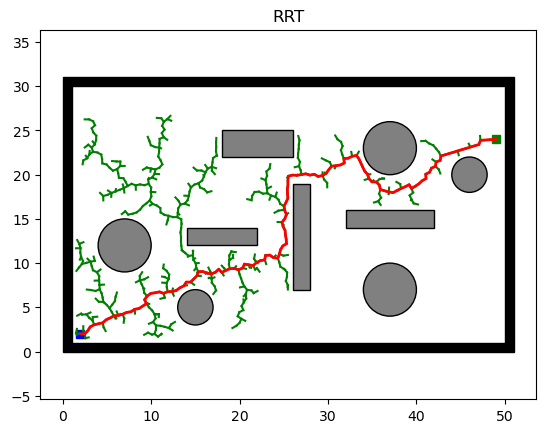

In [4]:
ts = time.time()
path_rrt = rrt.planning()
tf = time.time()
T_rrt = tf-ts
total_distance_rrt = rrt.plotting.get_distance_path(path_rrt)
print(f"Computation time: {T_rrt} secs")
print(f"Total distance: {total_distance_rrt} m")
rrt.plotting.plot_grid("RRT")
rrt.plotting.plot_visited(rrt.vertex, False)
rrt.plotting.plot_path(path_rrt)

Run RRT*

Computation time: 221.28457140922546 secs
Total distance: 57.10079881234233 m


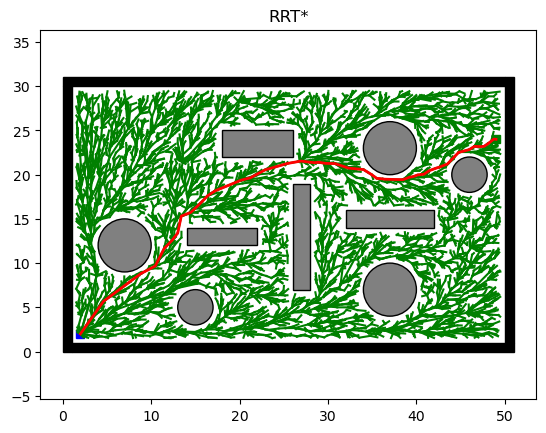

In [5]:
ts = time.time()
rrt_star.planning()
tf = time.time()
T_rrt_star = tf-ts
total_distance_rrt_star = rrt_star.plotting.get_distance_path(rrt_star.path)
print(f"Computation time: {T_rrt_star} secs")
print(f"Total distance: {total_distance_rrt_star} m")
rrt_star.plotting.plot_grid("RRT*")
rrt_star.plotting.plot_visited(rrt_star.vertex, False)
rrt_star.plotting.plot_path(rrt_star.path)

Result and Analysis

In [6]:
def plot_metrics(list_time_duration, list_path_length, parameter_name):
    import matplotlib.pyplot as plt 
    # Convert data to list of lists
    values = list(list_time_duration.values())
    # Create boxplot
    plt.boxplot(values, labels=list_time_duration.keys())
    plt.xlabel(parameter_name)
    plt.ylabel('Time (secs)')
    plt.show()

    values = list(list_path_length.values())
    # Create boxplot
    plt.boxplot(values, labels=list_path_length.keys())
    plt.xlabel(parameter_name)
    plt.ylabel('Length (m)')
    plt.show()


Step Length

In [7]:
list_step_len = [5,10]
list_time_duration = {}
list_path_length = {}
N_experiment = 5
for step_len in list_step_len:
    list_time_duration[step_len] = []
    list_path_length[step_len] = []
    for i in range(N_experiment):
        rrt_star = RrtStar(x_start, x_goal, step_len=step_len, goal_sample_rate=0.1, search_radius=20, iter_max=8000)
        ts = time.time()
        rrt_star.planning()
        tf = time.time()
        T_rrt_star = tf-ts
        total_distance_rrt_star = rrt_star.plotting.get_distance_path(rrt_star.path)
        print("============================")
        print(f"Experiment-{i} Step Length: {step_len}")
        print(f"Computation time: {T_rrt_star} secs")
        print(f"Total distance: {total_distance_rrt_star} m")
        list_time_duration[step_len].append(T_rrt_star)
        list_path_length[step_len].append(total_distance_rrt_star)

Experiment-0 Step Length: 5
Computation time: 100.28276872634888 secs
Total distance: 58.27570692719143 m
Experiment-1 Step Length: 5
Computation time: 112.75312805175781 secs
Total distance: 57.838386561516565 m
Experiment-2 Step Length: 5
Computation time: 92.17972421646118 secs
Total distance: 58.52475369656163 m
Experiment-3 Step Length: 5
Computation time: 95.02280592918396 secs
Total distance: 58.59476968547633 m
Experiment-4 Step Length: 5
Computation time: 97.2685375213623 secs
Total distance: 58.01838986029948 m
Experiment-0 Step Length: 10
Computation time: 83.90955972671509 secs
Total distance: 57.61693826952987 m
Experiment-1 Step Length: 10
Computation time: 109.28395056724548 secs
Total distance: 59.029575482532756 m
Experiment-2 Step Length: 10
Computation time: 72.1056261062622 secs
Total distance: 59.15774986004349 m
Experiment-3 Step Length: 10
Computation time: 67.45690274238586 secs
Total distance: 57.09223673441594 m
Experiment-4 Step Length: 10
Computation time: 6

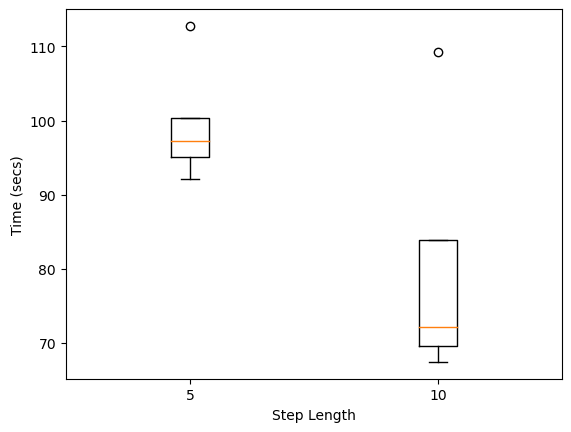

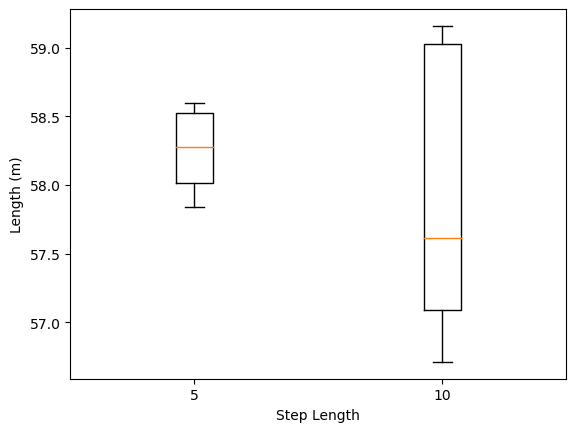

In [8]:
plot_metrics(list_time_duration, list_path_length, "Step Length")

Goal Sample Rate Analysis

In [9]:
list_goal_sample_rate = [0.1,0.3]
# ADD YOUR CODE HERE
list_time_duration = {}
list_path_length = {}
N_experiment = 2
for goal_sample_rate in list_goal_sample_rate:
    list_time_duration[goal_sample_rate] = []
    list_path_length[goal_sample_rate] = []
    for i in range(N_experiment):
        rrt_star = RrtStar(x_start, x_goal, step_len=10, goal_sample_rate=goal_sample_rate, search_radius=20, iter_max=8000)
        ts = time.time()
        rrt_star.planning()
        tf = time.time()
        T_rrt_star = tf-ts
        total_distance_rrt_star = rrt_star.plotting.get_distance_path(rrt_star.path)
        print("============================")
        print(f"Experiment-{i} Goal Sample Rate: {goal_sample_rate}")
        print(f"Computation time: {T_rrt_star} secs")
        print(f"Total distance: {total_distance_rrt_star} m")
        list_time_duration[goal_sample_rate].append(T_rrt_star)
        list_path_length[goal_sample_rate].append(total_distance_rrt_star)

Experiment-0 Goal Sample Rate: 0.1
Computation time: 84.07369065284729 secs
Total distance: 62.26509143834824 m
Experiment-1 Goal Sample Rate: 0.1
Computation time: 93.90271139144897 secs
Total distance: 60.631985125522824 m
Experiment-0 Goal Sample Rate: 0.3
Computation time: 454.35729789733887 secs
Total distance: 60.33994707782601 m
Experiment-1 Goal Sample Rate: 0.3
Computation time: 344.272647857666 secs
Total distance: 65.21973750640925 m


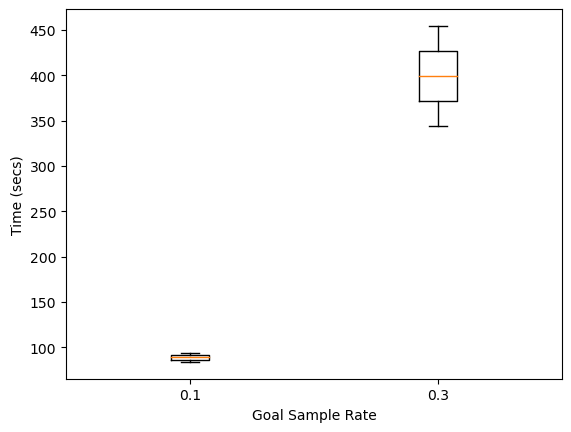

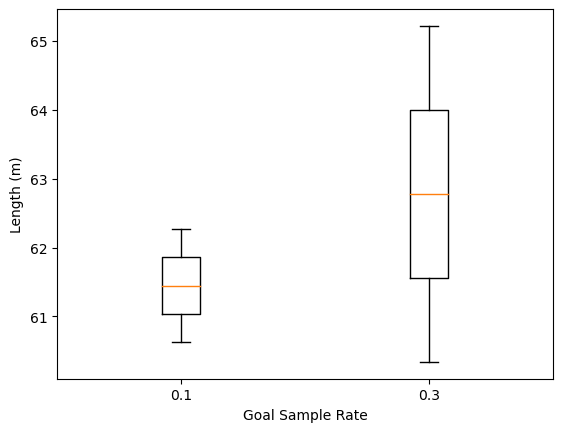

In [10]:
plot_metrics(list_time_duration, list_path_length, "Goal Sample Rate")

Search Radius Analysis

In [11]:
list_search_radius = [10,20]
# ADD YOUR CODE HERE
list_time_duration = {}
list_path_length = {}
N_experiment = 2
for search_radius in list_search_radius:
    list_time_duration[search_radius] = []
    list_path_length[search_radius] = []
    for i in range(N_experiment):
        rrt_star = RrtStar(x_start, x_goal, step_len=10, goal_sample_rate=0.1, search_radius=search_radius, iter_max=8000)
        ts = time.time()
        rrt_star.planning()
        tf = time.time()
        T_rrt_star = tf-ts
        total_distance_rrt_star = rrt_star.plotting.get_distance_path(rrt_star.path)
        print("============================")
        print(f"Experiment-{i} Search Radius: {search_radius}")
        print(f"Computation time: {T_rrt_star} secs")
        print(f"Total distance: {total_distance_rrt_star} m")
        list_time_duration[search_radius].append(T_rrt_star)
        list_path_length[search_radius].append(total_distance_rrt_star)

Experiment-0 Search Radius: 10
Computation time: 37.615291595458984 secs
Total distance: 75.19566315152252 m
Experiment-1 Search Radius: 10
Computation time: 39.187995195388794 secs
Total distance: 75.26388861930177 m
Experiment-0 Search Radius: 20
Computation time: 81.10179424285889 secs
Total distance: 58.45291742660708 m
Experiment-1 Search Radius: 20
Computation time: 100.95150995254517 secs
Total distance: 60.700933961832824 m


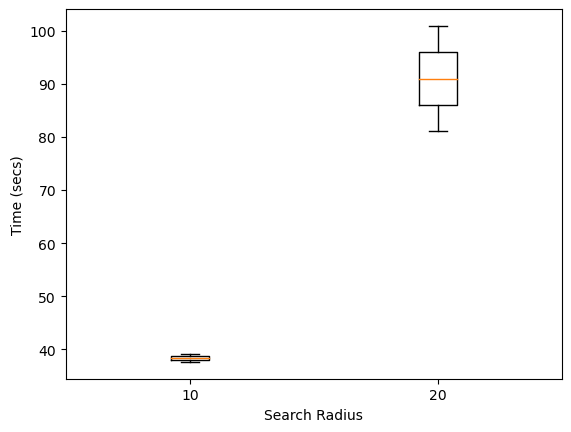

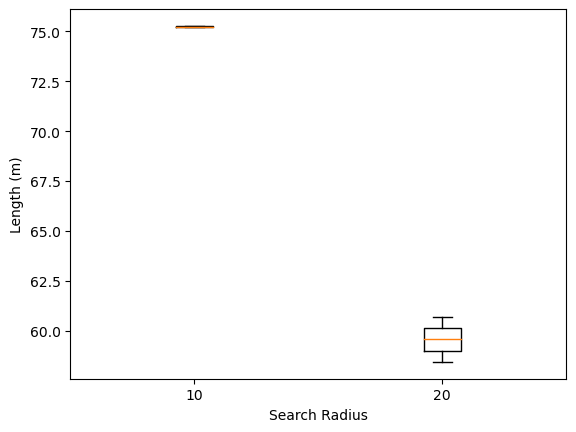

In [12]:
plot_metrics(list_time_duration, list_path_length, "Search Radius")